In [1]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("max_colwidth", 100)
sns.set(rc={"figure.figsize": (30, 14)})

In [16]:
files_list = glob.glob("./results/without_stopwords/trump/*.json")
dfs = []
for f in files_list:
    embedding_retrieval_type = "_".join(f.split("_")[4:-1]) + "_pooling"
    df = pd.read_json(f)
    df["embedding_retrieval_type"] = embedding_retrieval_type
    dfs.append(df)

In [17]:
full_results = pd.concat(dfs)

In [18]:
full_results

,Dataset,Dataset Size,Model,Params,Scores,Computation Time,embedding_retrieval_type
0,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 10, 'min_topic_size'...","{'npmi': -0.07514897227418, 'diversity': 0.655555555555555}",73.588629,embedding_concat_last_four_layers_cls_pooling
1,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 20, 'min_topic_size'...","{'npmi': -0.08689647085155301, 'diversity': 0.7210526315789471}",73.504939,embedding_concat_last_four_layers_cls_pooling
2,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 30, 'min_topic_size'...","{'npmi': -0.08435807870650701, 'diversity': 0.772413793103448}",73.501112,embedding_concat_last_four_layers_cls_pooling
3,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 40, 'min_topic_size'...","{'npmi': -0.075868249404827, 'diversity': 0.782051282051282}",73.629761,embedding_concat_last_four_layers_cls_pooling
4,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 50, 'min_topic_size'...","{'npmi': -0.08045785262612101, 'diversity': 0.8}",73.506820,embedding_concat_last_four_layers_cls_pooling
...,...,...,...,...,...,...,...
0,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 10, 'min_topic_size'...","{'npmi': -0.019764587248286003, 'diversity': 0.866666666666666}",62.754244,embedding_sum_last_four_layers_mean_pooling
1,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 20, 'min_topic_size'...","{'npmi': -0.091380128463136, 'diversity': 0.8526315789473681}",58.500895,embedding_sum_last_four_layers_mean_pooling
2,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 30, 'min_topic_size'...","{'npmi': -0.11258106726109501, 'diversity': 0.8379310344827581}",58.053291,embedding_sum_last_four_layers_mean_pooling
3,../data/without_stopwords/trump,43754,BERTopic,"{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'nr_topics': 40, 'min_topic_size'...","{'npmi': -0.103773235469931, 'diversity': 0.815384615384615}",61.634061,embedding_sum_last_four_layers_mean_pooling


In [19]:
keys_to_extract = ["embedding_model", "nr_topics", "min_topic_size"]
for key in keys_to_extract:
    full_results[key] = full_results["Params"].apply(lambda x: x.get(key, None))
full_results.drop("Params", axis=1, inplace=True)

In [20]:
keys_to_extract = ["npmi", "diversity"]
for key in keys_to_extract:
    full_results[key] = full_results["Scores"].apply(lambda x: x.get(key, None))
full_results.drop("Scores", axis=1, inplace=True)

In [21]:
results_grouped = full_results.groupby(
    [full_results["embedding_retrieval_type"], full_results["nr_topics"]], as_index=False
)[["nr_topics", "npmi", "diversity", "Computation Time"]].mean()

In [22]:
def rename_embedding_type(name):
    # Split the name into parts
    parts = name.split("_")

    # Define the new names for each part
    new_name_parts = {
        "concat": "Concat",
        "sum": "Sum",
        "last": "Last",
        "second": "Second",
        "all": "All",
        "four": "Four",
        "layers": "Layers",
        "layer": "Layer",
        "output": "Output",
        "hidden": "Hidden",
    }

    # Determine the pooling type and place it in parentheses
    pooling = parts[-2].upper() if parts[-2] == "cls" else parts[-2].capitalize()
    pooling_type = f"({pooling} Pooling)"

    # Check for 'embedding_layer' to include "Embedding Layer" in the new name
    if "_".join(parts[:2]) == "embedding_layer":
        new_name = "Embedding Layer " + " ".join(
            new_name_parts.get(part, part.capitalize()) for part in parts[2:-2]
        )
    else:
        new_name = " ".join(new_name_parts.get(part, part.capitalize()) for part in parts[1:-2])

    # Add the pooling type
    new_name += " " + pooling_type

    # Remove extra spaces and return
    return " ".join(new_name.split())

In [23]:
results_grouped["embedding_retrieval_type"] = [rename_embedding_type(name) for name in results_grouped["embedding_retrieval_type"]]

In [24]:
results_sorted_npmi = (
    results_grouped.groupby("embedding_retrieval_type")
    .mean("npmi")
    .reset_index()
    .sort_values("npmi", ascending=False)
)
top_categories_npmi = results_sorted_npmi.head(5)["embedding_retrieval_type"].tolist()

In [25]:
results_sorted_npmi

,embedding_retrieval_type,nr_topics,npmi,diversity,Computation Time
10,Second Last Layer (Max Pooling),30.0,-0.006516,0.587889,65.402892
8,Last Hidden Layer (Mean Pooling),30.0,-0.032511,0.911744,57.627915
16,Sum Last Four Layers (Max Pooling),30.0,-0.044504,0.643490,64.433302
14,Sum All Layers (Mean Pooling),30.0,-0.047600,0.869932,57.838114
1,Concat Last Four Layers (Max Pooling),30.0,-0.048294,0.648145,83.431426
5,Embedding Layer Output (Mean Pooling),30.0,-0.049863,0.932156,64.346243
2,Concat Last Four Layers (Mean Pooling),30.0,-0.059609,0.796997,72.228472
12,Sum All Layers (CLS Pooling),30.0,-0.060803,0.718007,59.412480
6,Last Hidden Layer (CLS Pooling),30.0,-0.060995,0.887354,59.088336
11,Second Last Layer (Mean Pooling),30.0,-0.072766,0.724037,61.674947


In [26]:
results_sorted_diversity = (
    results_grouped.groupby("embedding_retrieval_type")
    .mean("diversity")
    .reset_index()
    .sort_values("diversity", ascending=False)
)
#results_sorted_diversity = results_sorted_diversity[results_sorted_diversity["embedding_retrieval_type"] != "Last Hidden Layer (Mean Pooling)"]
top_categories_diversity = results_sorted_diversity.head(5)["embedding_retrieval_type"].tolist()

In [30]:
results_sorted_diversity

,embedding_retrieval_type,nr_topics,npmi,diversity,Computation Time
3,Embedding Layer Output (CLS Pooling),30.0,-0.242707,0.981119,99.310423
5,Embedding Layer Output (Mean Pooling),30.0,-0.049863,0.932156,64.346243
8,Last Hidden Layer (Mean Pooling),30.0,-0.032511,0.911744,57.627915
6,Last Hidden Layer (CLS Pooling),30.0,-0.060995,0.887354,59.088336
14,Sum All Layers (Mean Pooling),30.0,-0.047600,0.869932,57.838114
17,Sum Last Four Layers (Mean Pooling),30.0,-0.086047,0.834931,60.373541
7,Last Hidden Layer (Max Pooling),30.0,-0.127165,0.824049,62.569205
2,Concat Last Four Layers (Mean Pooling),30.0,-0.059609,0.796997,72.228472
9,Second Last Layer (CLS Pooling),30.0,-0.074930,0.783865,63.713127
0,Concat Last Four Layers (CLS Pooling),30.0,-0.080546,0.746215,74.305589


In [27]:
default_setting = results_grouped[
    results_grouped["embedding_retrieval_type"] == "Last Hidden Layer (Mean Pooling)"
]

results_grouped = results_grouped[
    results_grouped["embedding_retrieval_type"] != "Last Hidden Layer (Mean Pooling)"
]

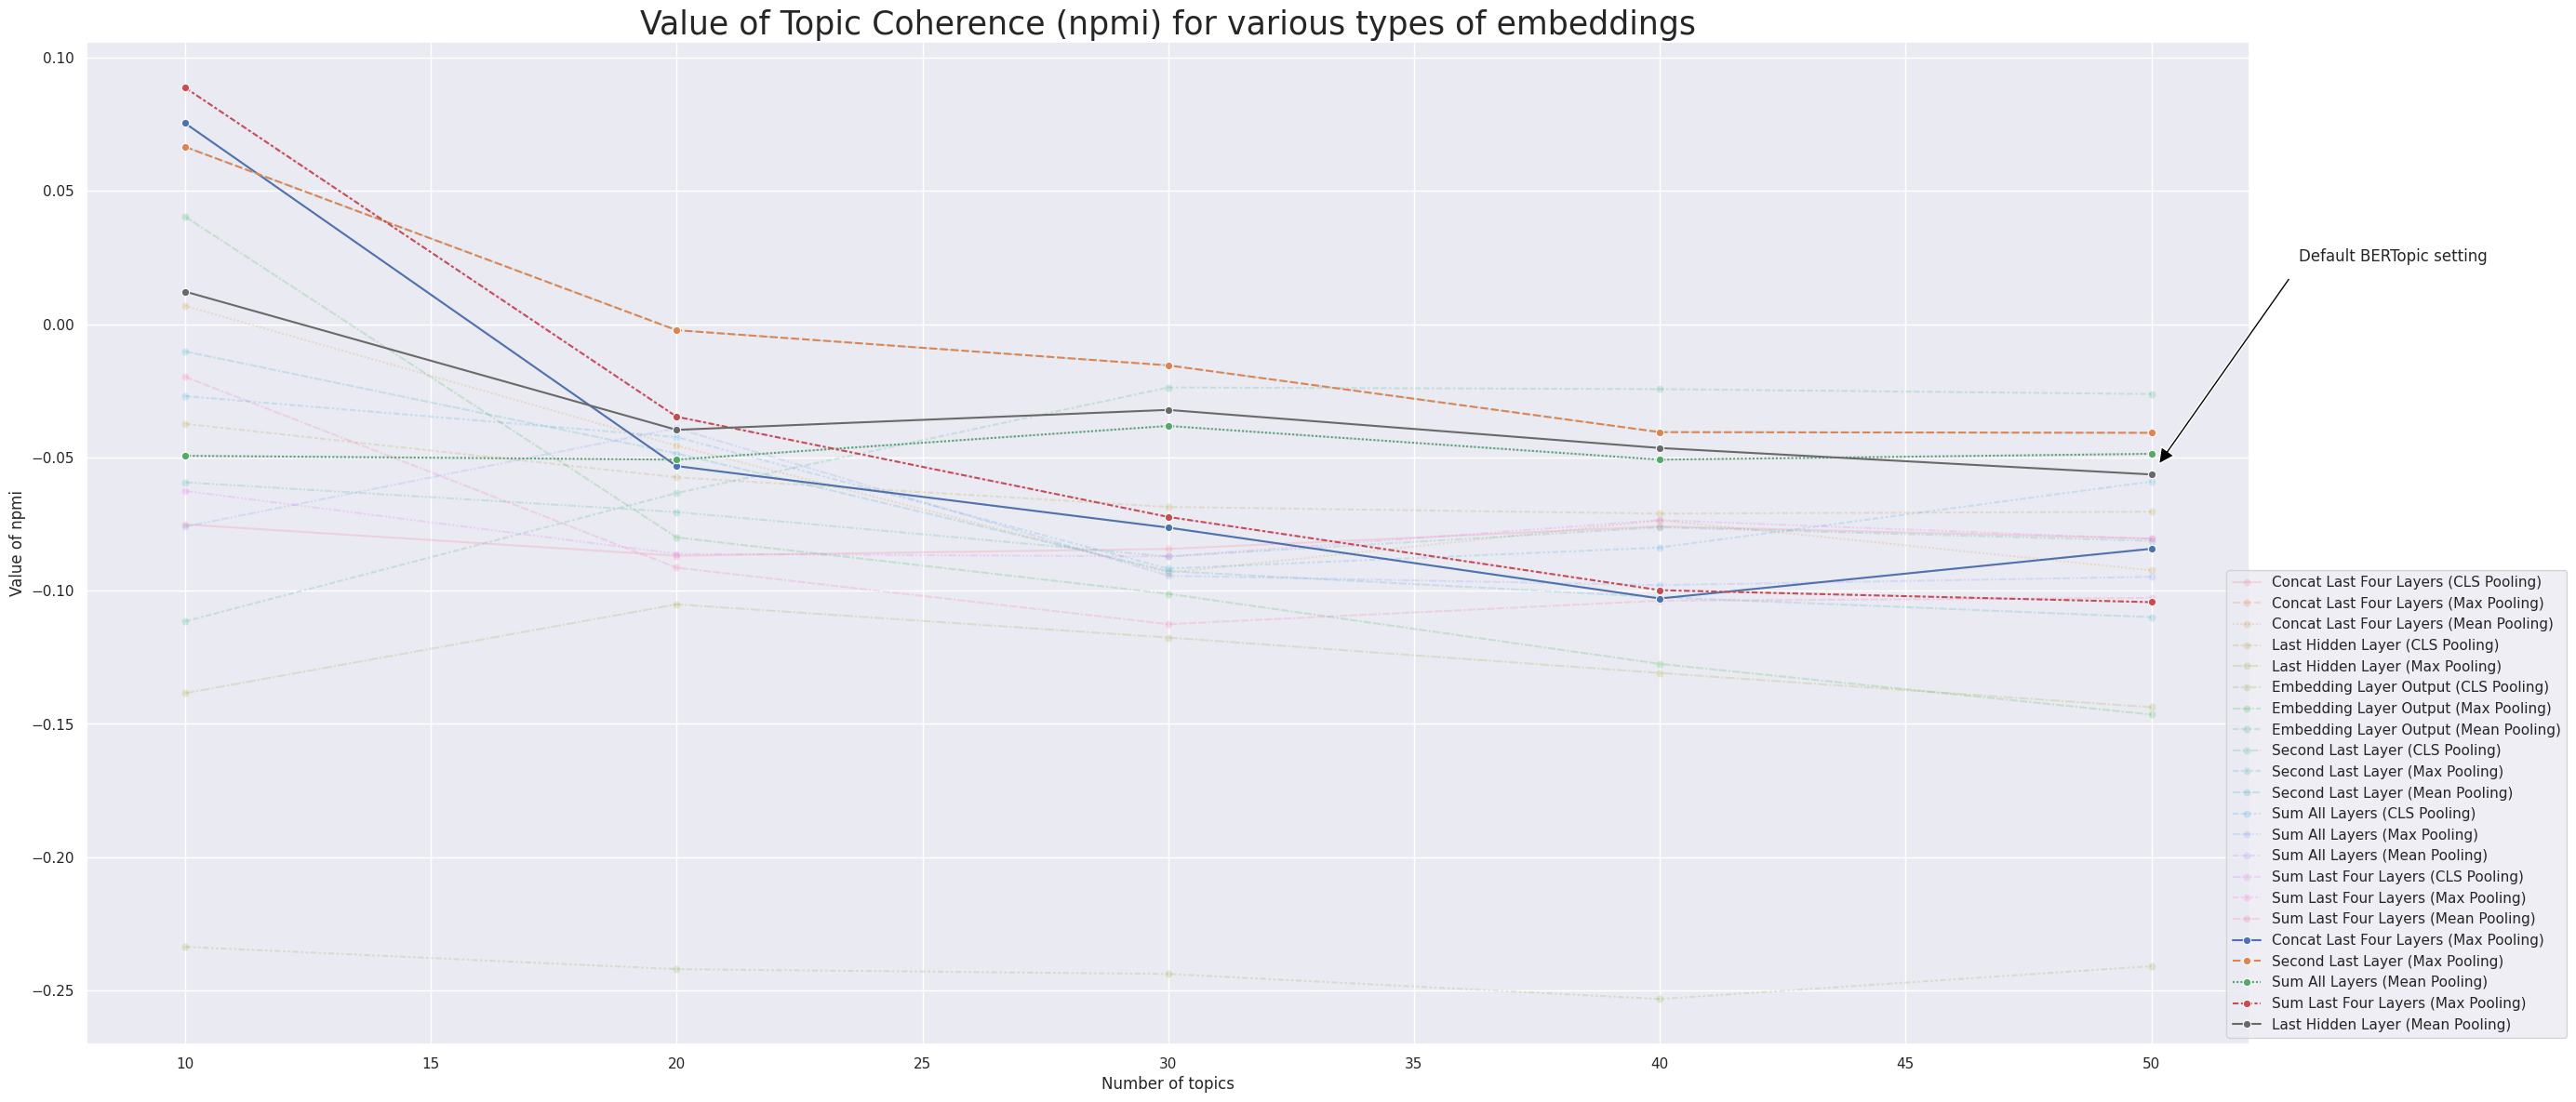

In [28]:
fig, ax = plt.subplots()
sns.lineplot(
    data=results_grouped,
    x="nr_topics",
    y="npmi",
    style="embedding_retrieval_type",
    hue="embedding_retrieval_type",
    alpha=0.2,
    marker="o",
    ax=ax,
)
sns.lineplot(
    data=results_grouped[results_grouped["embedding_retrieval_type"].isin(top_categories_npmi)],
    x="nr_topics",
    y="npmi",
    style="embedding_retrieval_type",
    hue="embedding_retrieval_type",
    alpha=1,
    marker="o",
    ax=ax,
)

sns.lineplot(
    data=default_setting,
    x="nr_topics",
    y="npmi",
    style="embedding_retrieval_type",
    color="dimgrey",
    alpha=1,
    marker="o",
    ax=ax,
)
plt.xlabel("Number of topics")
plt.ylabel("Value of npmi")
plt.title("Value of Topic Coherence (npmi) for various types of embeddings", size=25)

line = ax.lines[-2]
x_data = line.get_xdata()
y_data = line.get_ydata()
x_to_annotate = x_data[-1]
y_to_annotate = y_data[-1]

ax.annotate(
    "Default BERTopic setting",
    xy=(x_to_annotate, y_to_annotate),
    xytext=(x_to_annotate + 3, y_to_annotate + 0.08),
    arrowprops=dict(facecolor="black", shrink=0.05, width=2),
)

ax.legend(loc="lower right", bbox_to_anchor=(1.15, 0))
plt.show()

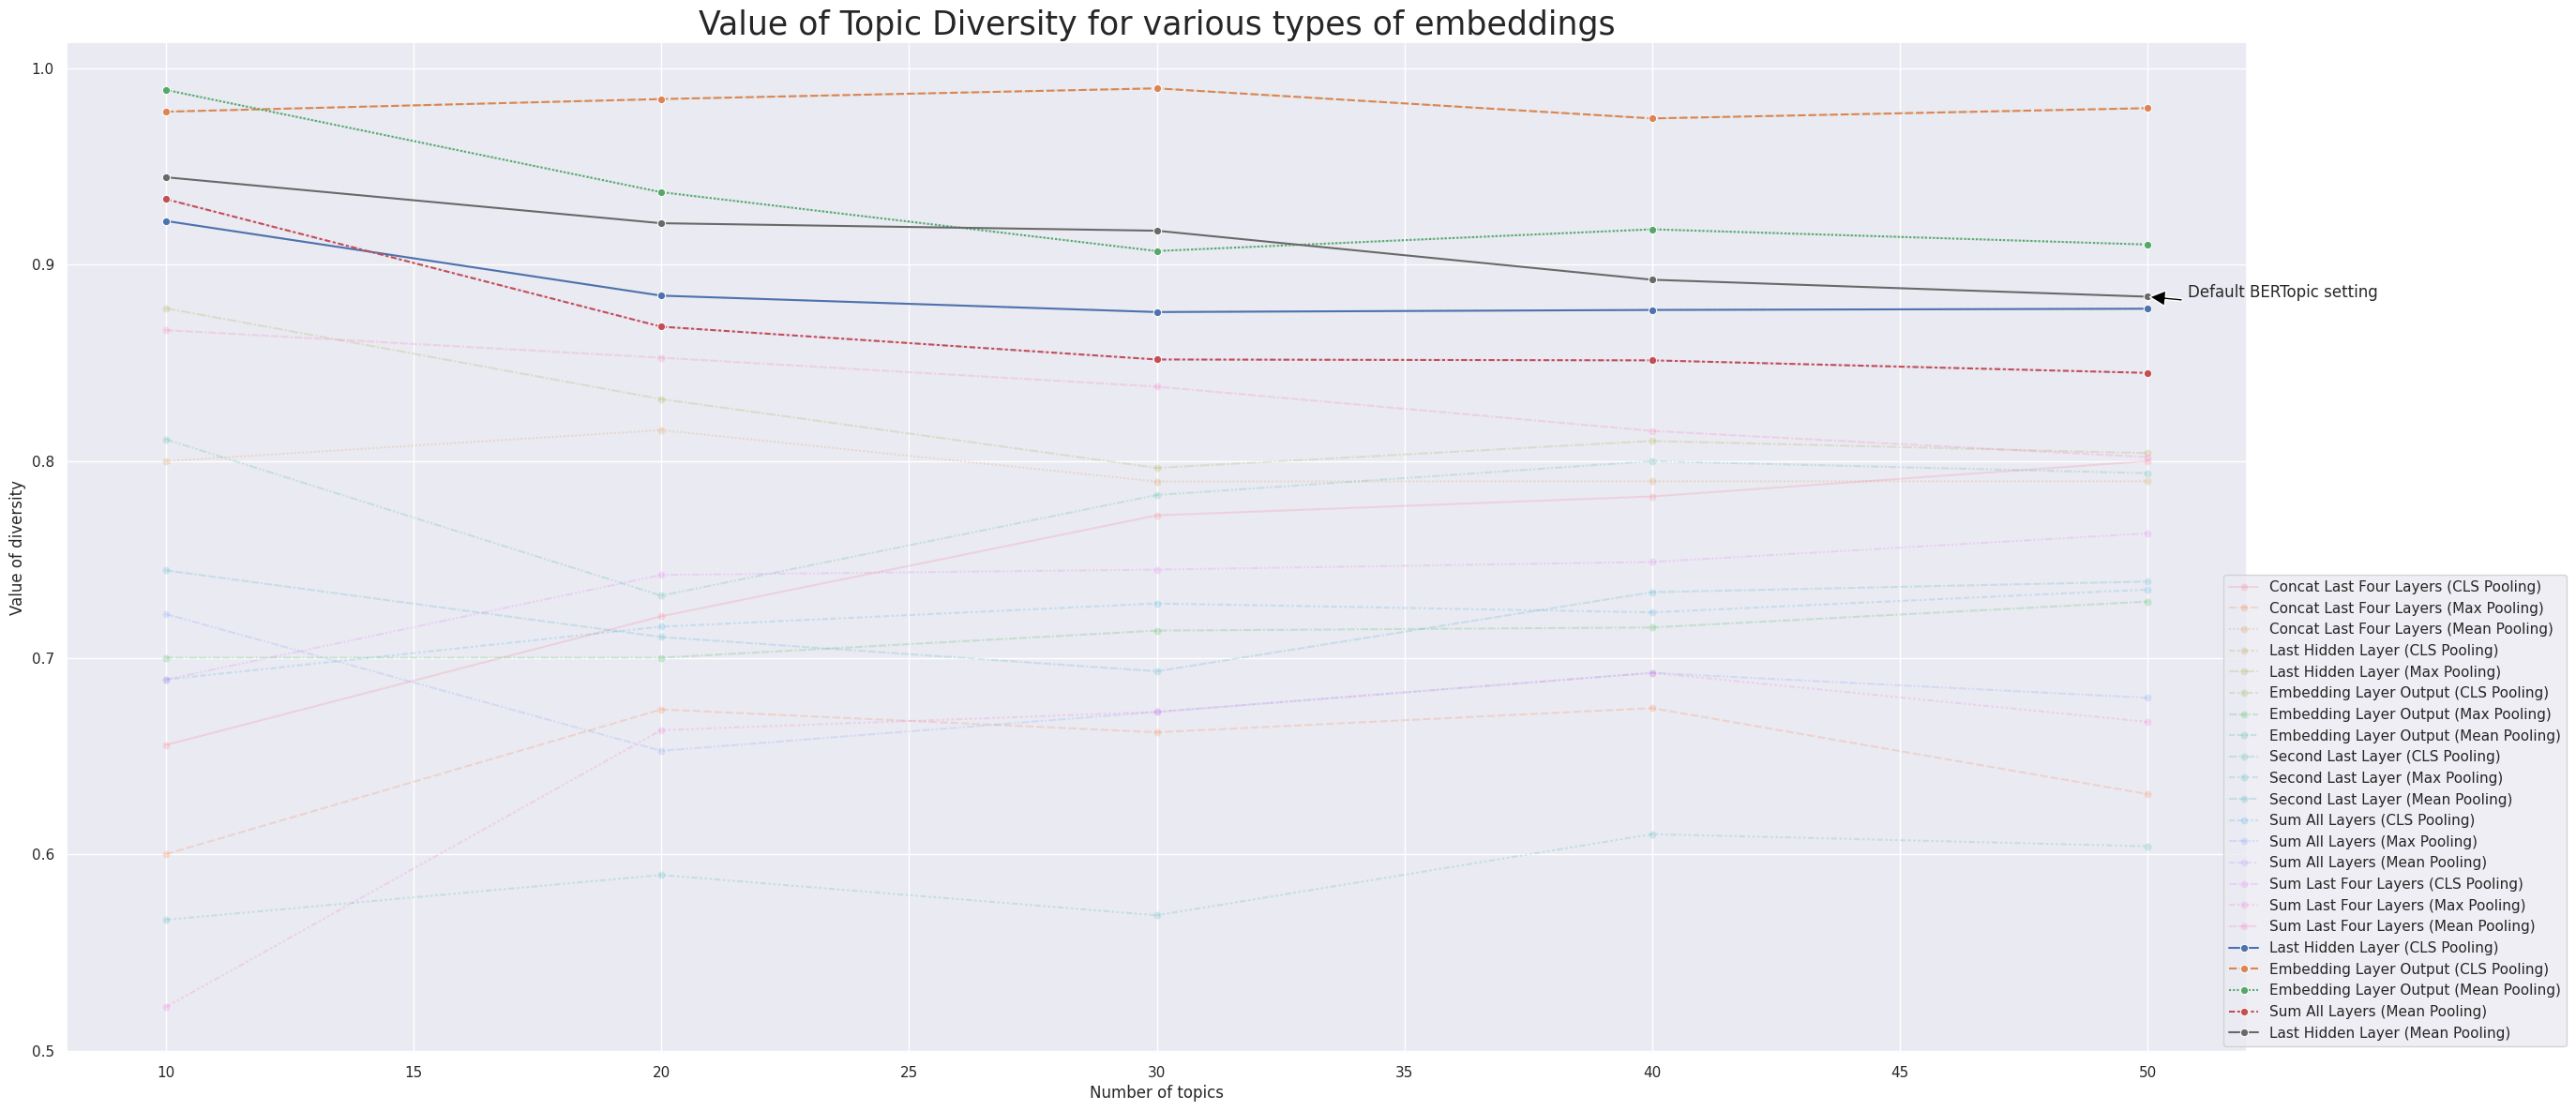

In [29]:
fig, ax = plt.subplots()
sns.lineplot(
    data=results_grouped,
    x="nr_topics",
    y="diversity",
    style="embedding_retrieval_type",
    hue="embedding_retrieval_type",
    alpha=0.2,
    marker="o",
    ax=ax,
)
sns.lineplot(
    data=results_grouped[results_grouped["embedding_retrieval_type"].isin(top_categories_diversity)],
    x="nr_topics",
    y="diversity",
    style="embedding_retrieval_type",
    hue="embedding_retrieval_type",
    alpha=1,
    marker="o",
    ax=ax,
)

sns.lineplot(
    data=default_setting,
    x="nr_topics",
    y="diversity",
    style="embedding_retrieval_type",
    color="dimgrey",
    alpha=1,
    marker="o",
    ax=ax,
)
plt.xlabel("Number of topics")
plt.ylabel("Value of diversity")
plt.title("Value of Topic Diversity for various types of embeddings", size=25)

line = ax.lines[-2]
x_data = line.get_xdata()
y_data = line.get_ydata()
x_to_annotate = x_data[-1]
y_to_annotate = y_data[-1]

ax.annotate(
    "Default BERTopic setting",
    xy=(x_to_annotate, y_to_annotate),
    xytext=(x_to_annotate + 0.8, y_to_annotate),
    arrowprops=dict(facecolor="black", shrink=0.05, width=2),
)

ax.legend(loc="lower right", bbox_to_anchor=(1.15, 0))
plt.show()